<h1 style="color:pink;">Visualization Explanation</h1>

<p style="font-size:20px;">
In this section, we visualize the results of the Low-Rank Multiplication (LRM) algorithm. 
The goal is to compare the original matrix multiplication (<b>A × B</b>) with the 
approximated results obtained using different percentages of singular values.
</p>

<h2 style="color:MediumVioletRed;">Top Row – Matrix Heatmaps</h2>
<p style="font-size:20px;">
Each heatmap displays the matrix values using color to represent magnitude:
<ul style="font-size:20px;">
  <li><b>Red</b> → large positive values</li>
  <li><b>Blue</b> → large negative values</li>
  <li><b>White</b> → values near zero</li>
</ul>
The first heatmap shows the <b>original product</b> (<b>A × B</b>), while the others 
show the <b>approximated matrices</b> reconstructed using fewer singular values. 
As the percentage decreases, you can observe a gradual loss of fine details and precision.
</p>

<h2 style="color:MediumVioletRed;">Bottom Row – Difference Heatmaps</h2>
<p style="font-size:20px;">
Each difference heatmap shows how much the approximation deviates from the true result. 
<ul style="font-size:20px;">
  <li><span style="color:red;"><b>Red</b></span> → large positive values</li>
  <li><span style="color:blue;"><b>Blue</b></span> → large negative values</li>
  <li><span style="color:gray;"><b>White</b></span> → values near zero</li>
</ul>
The more color intensity you see, the larger the reconstruction error for that percentage.
</p>


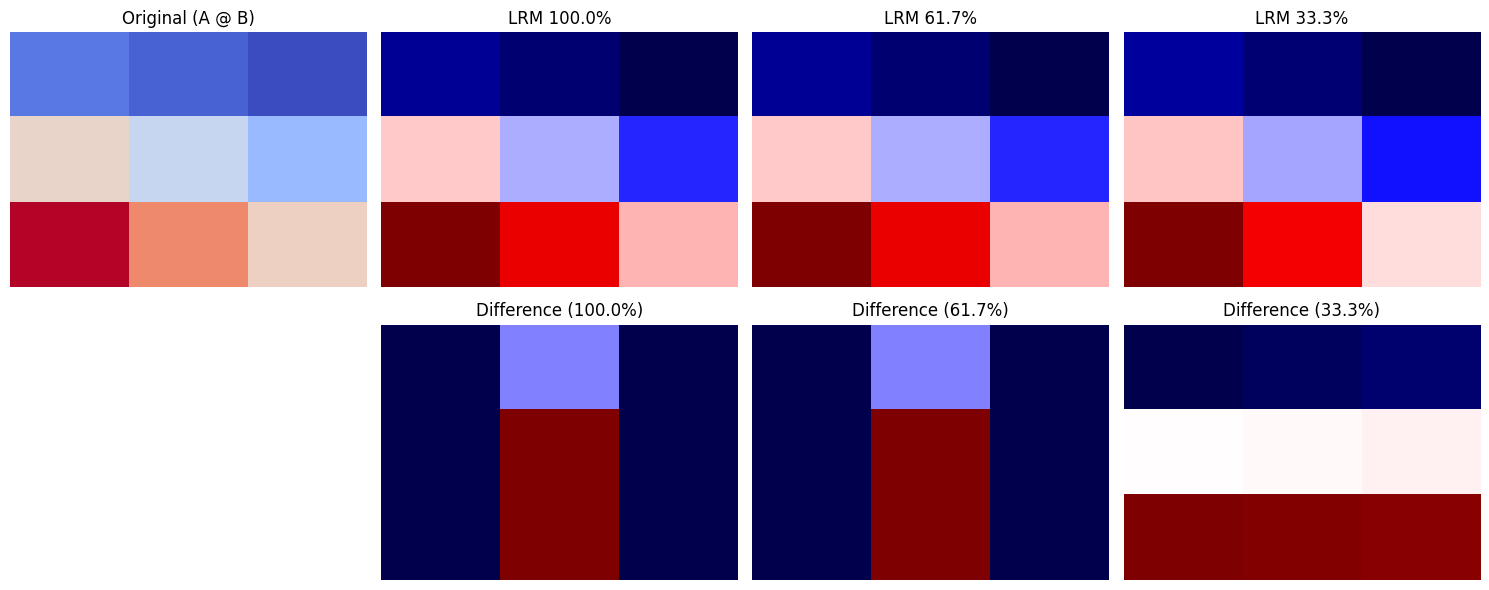

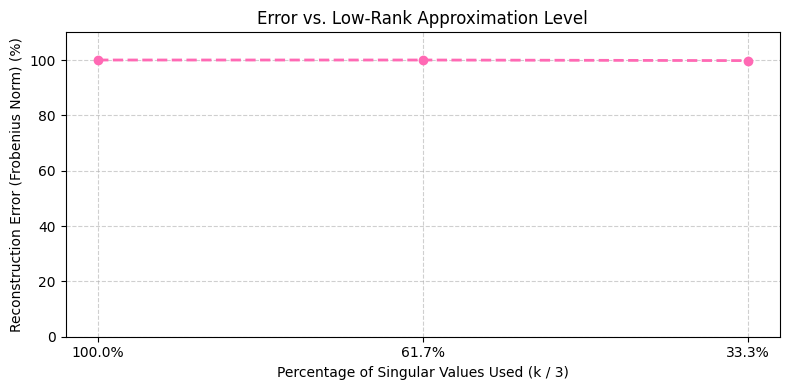

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def LRM_percentage(matrix_A, matrix_B, percentage):
    # SVD decomposition of matrix A
    U, S, VT = np.linalg.svd(matrix_A, full_matrices=False)
    
    # Determine number of singular values to use (k)
    num_singular_values = len(S)
    k = int(np.ceil(num_singular_values * (percentage / 100)))
    k = max(1, min(k, num_singular_values))  # ensure at least 1, at most all

    # Keep only top-k singular values
    S_k = S[:k]
    

    step1 = VT[:k, :] @ matrix_B
    
    
    scaled_step1 = S_k[:, np.newaxis] * step1

    # 3. Multiply by U: (m x k) @ (k x n) -> (m x n)
    final_result = U[:, :k] @ scaled_step1
    
    
    return final_result

matrix_A = np.array([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12]
], dtype=float) 
matrix_B = np.array([
    [10, 9, 8],
    [7, 6, 5],
    [4, 3, 2],
    [1, 0, -1]
], dtype=float)

direct_result = matrix_A @ matrix_B

# Define percentages
percentages = [100, 61.7, 33.3]
results = []
errors = []

percentages = [100, 61.7, 33.3]
for p in percentages:
    result = LRM_percentage(matrix_A, matrix_B, percentage=p)
    results.append(result)  
    error_percentage = (np.linalg.norm(result, 'fro') / np.linalg.norm(direct_result, 'fro')) * 100
    errors.append(error_percentage)



# ---- Visualization ----
fig, axes = plt.subplots(2, len(percentages) + 1, figsize=(15, 6))

# Original product heatmap
axes[0, 0].imshow(direct_result, cmap='coolwarm', aspect='auto')
axes[0, 0].set_title("Original (A @ B)")
axes[0, 0].axis('off')

# Difference heatmaps
for i, (p, result) in enumerate(zip(percentages, results)):
    axes[0, i+1].imshow(result, cmap='seismic', aspect='auto')
    axes[0, i+1].set_title(f"LRM {p:.1f}%")
    axes[0, i+1].axis('off')

    diff = direct_result - result
    axes[1, i+1].imshow(diff, cmap='seismic', aspect='auto')
    axes[1, i+1].set_title(f"Difference ({p:.1f}%)")
    axes[1, i+1].axis('off')

axes[1, 0].axis('off')  # empty spot

plt.tight_layout()
plt.show()


# ---- Error Plot ----
plt.figure(figsize=(8, 4))


x_positions = np.arange(len(percentages))
x_labels = [f'{p:.1f}%' for p in percentages]

plt.plot(x_positions, errors, 
         color='#FF69B4', 
         marker='o',         
         linestyle='--',     
         linewidth=2)


plt.xticks(x_positions, x_labels)

y_max = max(errors) * 1.1 if max(errors) > 0 else 100 
plt.ylim(0, y_max) 

plt.xlabel("Percentage of Singular Values Used (k / 3)")
plt.ylabel("Reconstruction Error (Frobenius Norm) (%)")
plt.title("Error vs. Low-Rank Approximation Level")
plt.grid(True, linestyle='--', alpha=0.6) 
plt.tight_layout()
plt.show()

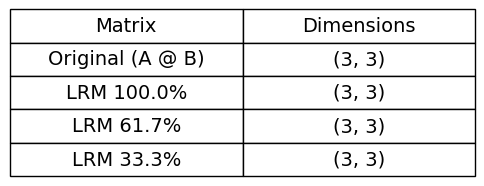

In [7]:
import matplotlib.pyplot as plt

# Create a table showing the dimensions of each difference matrix
matrix_names = [f"LRM {p:.1f}%" for p in percentages]
dims = [result.shape for result in results]

# Include the original matrix for reference
matrix_names = ["Original (A @ B)"] + matrix_names
dims = [direct_result.shape] + dims

# Create a figure for the table
fig, ax = plt.subplots(figsize=(6, 2))
ax.axis('tight')
ax.axis('off')

# Table data
table_data = [[name, str(dim)] for name, dim in zip(matrix_names, dims)]

# Add the table to the figure
table = ax.table(cellText=table_data, colLabels=["Matrix", "Dimensions"], loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1, 2)  # width, height scaling

plt.show()


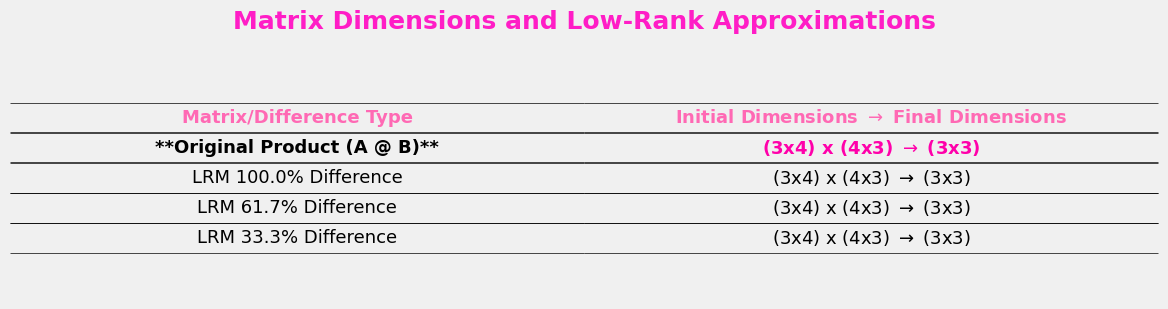

In [23]:
import matplotlib.pyplot as plt
import numpy as np 

dim_A = (3,4) # (m, k)
dim_B = (4,3) # (k, n)
percentages = [100, 61.7, 33.3]

# list of the different shapes of the matrices
results_shapes = [
    (3,3),
    (3,3),
    (3,3)
]
direct_result_shape = (3,3)
# ----------------------------------------------------------------

def format_dims(result_dim, dim_A, dim_B):
    """Formats the dimensions as: (m x k) x (k x n) -> (m x n)"""
    m, k_A = dim_A
    k_B, n = dim_B
    m_res, n_res = result_dim
  
    return f"({m}x{k_A}) x ({k_B}x{n}) $\\rightarrow$ ({m_res}x{n_res})"

def plot_dimension_table(dim_A, dim_B, percentages, results_shapes, direct_result_shape):
    """Creates a stylized table showing matrix dimensions and LRM differences."""

    # Prepare Data
    formatted_dims = [format_dims(shape, dim_A, dim_B) for shape in results_shapes]
    matrix_names = [f"LRM {p:.1f}% Difference" for p in percentages]

    # Include the original matrix
    matrix_names.insert(0, "**Original Product (A @ B)**")
    formatted_dims.insert(0, format_dims(direct_result_shape, dim_A, dim_B))

    table_data = [[name, dim_str] for name, dim_str in zip(matrix_names, formatted_dims)]
    col_labels = ["Matrix/Difference Type", "Initial Dimensions $\\rightarrow$ Final Dimensions"]

 
    with plt.style.context('fivethirtyeight'): 
        
        #  Setup Figure and Axes
        fig_height = len(matrix_names) * 0.5 + 1.0 
        fig, ax = plt.subplots(figsize=(11, fig_height))
        ax.axis('tight')
        ax.axis('off')
        
        # Table Creation
        table = ax.table(cellText=table_data, 
                         colLabels=col_labels, 
                         loc='center', 
                         cellLoc='center', 
                         edges='horizontal')   
              
        # Table Styling 
        ax.set_title('Matrix Dimensions and Low-Rank Approximations', 
                     fontsize=18, 
                     weight='bold', 
                     color="#FF1DC6",
                     pad=20)

        table.auto_set_font_size(False)
        table.set_fontsize(13)
        table.scale(1.2, 1.8) 

        # Custom Cell Styling
        header_color = "#FF46C1" 
        data_color_odd = "#FF9CE1" 
        
        for (r, c), cell in table.get_celld().items():
            cell.set_linewidth(0.5)
            
            if r == 0:  # Header row
                cell.set_facecolor(header_color)
                cell.set_text_props(color='#FF69B4', weight='extra bold')
            elif r % 2 == 1: # Stripe odd rows (Original Product is r=1)
                cell.set_facecolor(data_color_odd)
            
         
            if r == 1 and c == 0: 
                cell.set_text_props(weight='bold')
            if r == 1 and c == 1:
                cell.set_text_props(weight='extra bold', color="#FF00AA") # Stronger emphasis

    plt.show()

# Run the function with your placeholder data
plot_dimension_table(dim_A, dim_B, percentages, results_shapes, direct_result_shape)